In [1]:
#load data

In [2]:
#import libraries
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import requests 
import pandas as pd
import dask.dataframe as pd_dd
import zipfile
import io
import wget
from shapely.geometry import Point
import geopandas as gpd
import random
import json
from fiona.crs import from_epsg
#import pysal as ps
import pylab as pl
import matplotlib.pyplot as plt

In [3]:
data1="/home/jinalklaulitz/Documents/capstone/Input/July 2018 Monthly LinkNYC Data - Per-AP.csv"
data2="/home/jinalklaulitz/Documents/capstone/Input/Link EBT Call Data 041219.xlsx"
data3="/home/jinalklaulitz/Documents/capstone/Input/aff_batch1/clean_batch1/food_stamps_supplemental_nutrition_assistance_program_snap.csv"
output_path="/home/jinalklaulitz/Documents/capstone/Input"

In [4]:
MONTHLY_LNYC_pd = pd.read_excel(data2,'EBT Call Data Per Link')
LINK_EBT_pd = pd.read_csv(data1)
food_stamps_pd = pd.read_csv(data3)

In [5]:
#look into dataset

In [6]:
food_stamps_pd.head()

,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,households_not_receiving_food_stamps/snap_estimate_households,percent_households_not_receiving_food_stamps/snap_estimate_households,total_estimate_with_one_or_more_people_in_the_household_60_years_and_over,percent_estimate_with_one_or_more_people_in_the_household_60_years_and_over,...,percent_households_receiving_food_stamps/snap_estimate_work_status__families__1_worker_in_past_12_months,households_not_receiving_food_stamps/snap_estimate_work_status__families__1_worker_in_past_12_months,percent_households_not_receiving_food_stamps/snap_estimate_work_status__families__1_worker_in_past_12_months,total_estimate_work_status__families__2_or_more_workers_in_past_12_months,percent_estimate_work_status__families__2_or_more_workers_in_past_12_months,households_receiving_food_stamps/snap_estimate_work_status__families__2_or_more_workers_in_past_12_months,percent_households_receiving_food_stamps/snap_estimate_work_status__families__2_or_more_workers_in_past_12_months,households_not_receiving_food_stamps/snap_estimate_work_status__families__2_or_more_workers_in_past_12_months,percent_households_not_receiving_food_stamps/snap_estimate_work_status__families__2_or_more_workers_in_past_12_months,PUMA
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,33935,80.1,17515,41.3,...,44.2,6871,34.8,12944,50.6,2059,35.2,10885,55.1,3701
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",48495,11904,24.5,36591,75.5,19175,39.5,...,41.4,9074,35.7,16831,49.9,3015,36.3,13816,54.3,3702
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",47551,6714,14.1,40837,85.9,22387,47.1,...,40.5,9011,36.2,14254,49.3,1249,30.9,13005,52.3,3703
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44518,11236,25.2,33282,74.8,16437,36.9,...,41.5,7838,35.2,14402,48.1,2332,30.4,12070,54.2,3704
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,28167,49.1,17137,29.8,...,48.6,7795,43.0,12966,34.0,4491,22.4,8475,46.8,3705


In [7]:
#create subset

In [8]:
#for i in list(food_stamps_pd.columns):
#    print(i)
#    print("\n")

reduced_food_stamps = food_stamps_pd[['id',
'id2',
'geography',
'total_estimate_households',
'households_receiving_food_stamps/snap_estimate_households',
'percent_households_receiving_food_stamps/snap_estimate_households',
'PUMA']]

In [9]:
#look into data

In [10]:
reduced_food_stamps.head()

,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",48495,11904,24.5,3702
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",47551,6714,14.1,3703
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44518,11236,25.2,3704
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705


In [11]:
reduced_food_stamps.dtypes

id                                                                    object
id2                                                                    int64
geography                                                             object
total_estimate_households                                              int64
households_receiving_food_stamps/snap_estimate_households              int64
percent_households_receiving_food_stamps/snap_estimate_households    float64
PUMA                                                                   int64
dtype: object

In [12]:
#load shapefile

In [13]:
filename = "geo_export_ba3ea3cb-cf7a-4165-a569-b8e93d5eb73e.shp"
pumashp = gpd.GeoDataFrame.from_file(output_path+"/"+filename)

In [14]:
pumashp.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...
1,3702,1.889860e+08,106050.002487,POLYGON ((-73.86948896192655 40.87798946841054...
2,3703,2.670108e+08,303565.021099,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415288,POLYGON ((-73.96524103510922 40.65174204697276...


In [15]:
pumashp.dtypes

puma           object
shape_area    float64
shape_leng    float64
geometry       object
dtype: object

In [16]:
pumashp['puma'] = pumashp.puma.astype('int64')

In [17]:
foodstamps_puma = reduced_food_stamps.merge(pumashp,left_on='PUMA',right_on='puma')

In [18]:
foodstamps_puma.head()

,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng,geometry
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",48495,11904,24.5,3702,3702,1.889860e+08,106050.002487,POLYGON ((-73.86948896192655 40.87798946841054...
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",47551,6714,14.1,3703,3703,2.670108e+08,303565.021099,(POLYGON ((-73.78833349834532 40.8346671297593...
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44518,11236,25.2,3704,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705,3705,1.224951e+08,68657.316149,POLYGON ((-73.87045508990893 40.86663286876232...


In [19]:
#check row count

In [20]:
print("table has {} rows".format(len(reduced_food_stamps.index)))

table has 55 rows


In [21]:
print("table has {} rows".format(len(pumashp.index)))

table has 55 rows


In [22]:
print("table has {} rows".format(len(foodstamps_puma.index)))

table has 55 rows


In [23]:
pumashp.crs

{'init': 'epsg:4326'}

In [24]:
pumashp.crs = {'init' :'epsg:4326'}

In [25]:
# Convert to a GeoDataFrame
foodstamps_puma = gpd.GeoDataFrame(foodstamps_puma, geometry="geometry")

In [26]:
foodstamps_puma.crs

In [27]:
#foodstamps_puma['test'] = foodstamps_puma['percent_households_receiving_food_stamps/snap_estimate_households']

In [28]:
#check shapefile

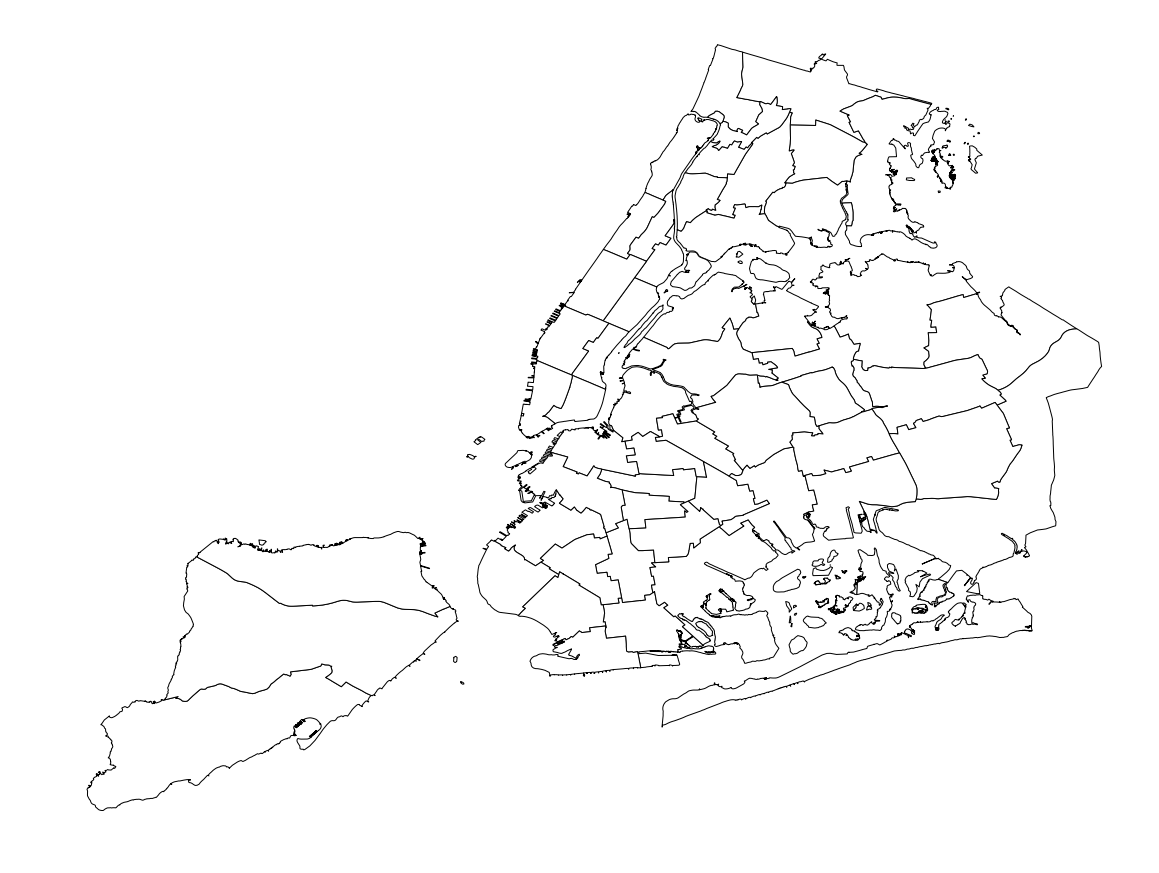

In [29]:
fig = pl.figure(figsize = (20,20))
ax = fig.add_subplot(111)
pumashp.plot(ax=ax, color="white", edgecolor="black", lw=1)
ax.axis('off');

In [30]:
#visualize percentage of households receiving foodstamps

Text(0.5, 1.0, 'Percentage of households receiving foodstamps in NYC')

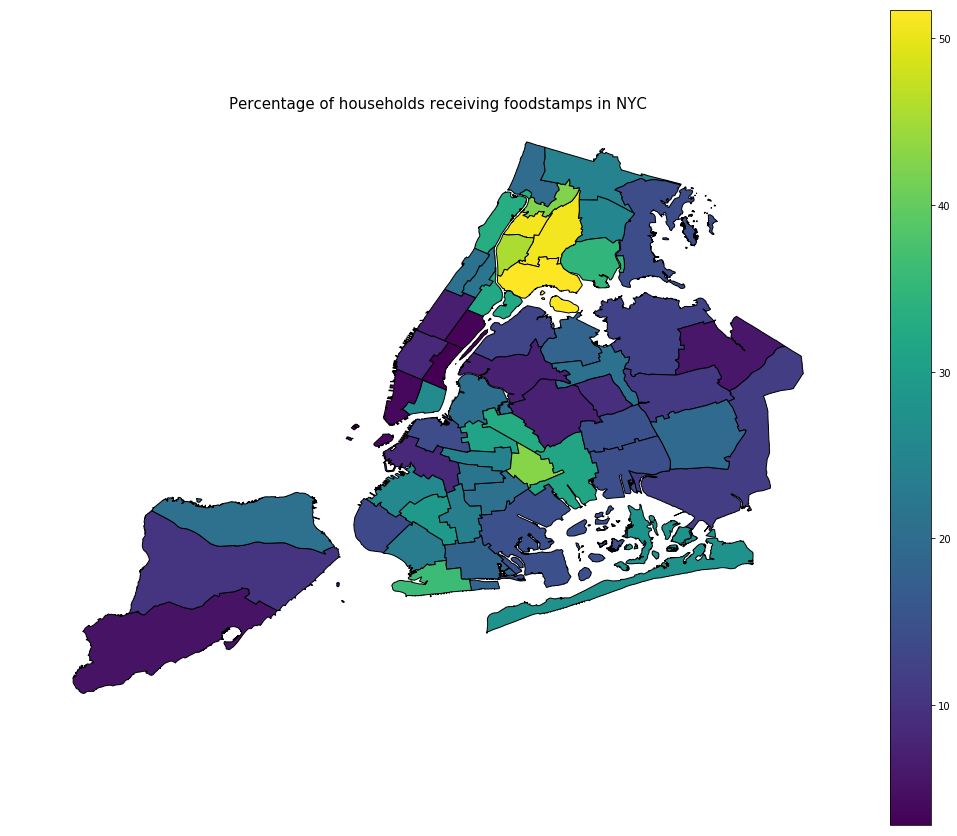

In [31]:
fig = pl.figure(figsize = (18,15))
ax = fig.add_subplot(111)
foodstamps_puma.plot("percent_households_receiving_food_stamps/snap_estimate_households",ax=ax,legend=True,linewidth=1,edgecolor='black')
ax.axis('off');
ax.set_title('Percentage of households receiving foodstamps in NYC', fontsize=15)

In [32]:
MONTHLY_LNYC_pd.head()

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,EBT Calls Per Day
0,bx-01-116415,2017-03-06,756,Bronx,201,40.816751,-73.922955,522 MORRIS AVENUE,10451,3900,5.158730
1,mn-11-144674,2016-11-02,840,Manhattan,111,40.803834,-73.936351,186 EAST 125 STREET,10035,3303,3.932143
2,mn-11-144673,2016-03-28,840,Manhattan,111,40.803731,-73.936139,192 EAST 125 STREET,10035,1849,2.201190
3,mn-03-108238,2016-08-19,840,Manhattan,103,40.721716,-73.993343,217 BOWERY,10002,1802,2.145238
4,bx-01-118956,2016-12-22,830,Bronx,201,40.816679,-73.916483,2882 3 AVENUE,10455,1788,2.154217


In [33]:
for i in list(MONTHLY_LNYC_pd.columns):
    print(i)


Site ID
﻿Activation Date
Days Since Activation
Borough
Community Board
Latitude
Longitude
Street Address
Zip Code
EBT Total Calls
EBT Calls Per Day


In [34]:
#create geopanda-able longlats
MONTHLY_LNYC_pd['lonlat'] = list(zip(MONTHLY_LNYC_pd.Longitude, MONTHLY_LNYC_pd.Latitude))
MONTHLY_LNYC_pd['geometry'] = MONTHLY_LNYC_pd[['lonlat']].applymap(lambda x:Point(x))
# Convert to a GeoDataFrame
MONTHLY_LNYC_pd = gpd.GeoDataFrame(MONTHLY_LNYC_pd, geometry="geometry")

# set crs
MONTHLY_LNYC_pd.crs = {'init': 'epsg:4326'}

In [35]:
MONTHLY_LNYC_pd.crs

{'init': 'epsg:4326'}

In [36]:
foodstamps_puma.crs

In [37]:
MONTHLY_LNYC_pd.head()

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,EBT Calls Per Day,lonlat,geometry
0,bx-01-116415,2017-03-06,756,Bronx,201,40.816751,-73.922955,522 MORRIS AVENUE,10451,3900,5.158730,"(-73.92295481, 40.81675132)",POINT (-73.92295480999999 40.81675132)
1,mn-11-144674,2016-11-02,840,Manhattan,111,40.803834,-73.936351,186 EAST 125 STREET,10035,3303,3.932143,"(-73.93635101, 40.80383418)",POINT (-73.93635101 40.80383418)
2,mn-11-144673,2016-03-28,840,Manhattan,111,40.803731,-73.936139,192 EAST 125 STREET,10035,1849,2.201190,"(-73.936139, 40.803731)",POINT (-73.936139 40.803731)
3,mn-03-108238,2016-08-19,840,Manhattan,103,40.721716,-73.993343,217 BOWERY,10002,1802,2.145238,"(-73.993343, 40.721716)",POINT (-73.993343 40.721716)
4,bx-01-118956,2016-12-22,830,Bronx,201,40.816679,-73.916483,2882 3 AVENUE,10455,1788,2.154217,"(-73.91648285, 40.81667907)",POINT (-73.91648284999999 40.81667907)


In [38]:
EBT_FOODSTAMPS = gpd.sjoin(MONTHLY_LNYC_pd, foodstamps_puma, op='within') 

/home/jinalklaulitz/anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [39]:
EBT_FOODSTAMPS.head()

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,...,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng
0,bx-01-116415,2017-03-06,756,Bronx,201,40.816751,-73.922955,522 MORRIS AVENUE,10451,3900,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338
4,bx-01-118956,2016-12-22,830,Bronx,201,40.816679,-73.916483,2882 3 AVENUE,10455,1788,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338
5,bx-01-123228,2017-03-30,732,Bronx,201,40.816692,-73.919637,349 EAST 149 STREET,10451,1747,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338
33,bx-01-118955,2016-12-22,830,Bronx,201,40.817141,-73.916208,2901 3 AVENUE,10455,929,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338
40,bx-01-123208,2017-10-26,522,Bronx,201,40.816692,-73.916719,2883 3 AVENUE,10455,826,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338


In [40]:
for i in list(EBT_FOODSTAMPS.columns):
    print(i)

Site ID
﻿Activation Date
Days Since Activation
Borough
Community Board
Latitude
Longitude
Street Address
Zip Code
EBT Total Calls
EBT Calls Per Day
lonlat
geometry
index_right
id
id2
geography
total_estimate_households
households_receiving_food_stamps/snap_estimate_households
percent_households_receiving_food_stamps/snap_estimate_households
PUMA
puma
shape_area
shape_leng


In [41]:
viz_ebs_avgs = EBT_FOODSTAMPS[['EBT Total Calls','EBT Calls Per Day','lonlat','percent_households_receiving_food_stamps/snap_estimate_households','Community Board','puma','geometry','geography']]

In [42]:
viz_ebs_avgs.head(10)

,EBT Total Calls,EBT Calls Per Day,lonlat,percent_households_receiving_food_stamps/snap_estimate_households,Community Board,puma,geometry,geography
0,3900,5.158730,"(-73.92295481, 40.81675132)",51.7,201,3710,POINT (-73.92295480999999 40.81675132),NYC-Bronx Community District 1 & 2--Hunts Poin...
4,1788,2.154217,"(-73.91648285, 40.81667907)",51.7,201,3710,POINT (-73.91648284999999 40.81667907),NYC-Bronx Community District 1 & 2--Hunts Poin...
5,1747,2.386612,"(-73.919637, 40.816692)",51.7,201,3710,POINT (-73.91963699999999 40.816692),NYC-Bronx Community District 1 & 2--Hunts Poin...
33,929,1.119277,"(-73.91620844, 40.8171412)",51.7,201,3710,POINT (-73.91620844000001 40.8171412),NYC-Bronx Community District 1 & 2--Hunts Poin...
40,826,1.582375,"(-73.91671907, 40.8166923)",51.7,201,3710,POINT (-73.91671907 40.8166923),NYC-Bronx Community District 1 & 2--Hunts Poin...
41,821,2.325779,"(-73.91917137, 40.81399752)",51.7,201,3710,POINT (-73.91917137 40.81399752),NYC-Bronx Community District 1 & 2--Hunts Poin...
110,520,1.502890,"(-73.92143417, 40.81089649)",51.7,201,3710,POINT (-73.92143417 40.81089649),NYC-Bronx Community District 1 & 2--Hunts Poin...
112,518,1.644444,"(-73.91900611, 40.80775593)",51.7,201,3710,POINT (-73.91900611 40.80775593),NYC-Bronx Community District 1 & 2--Hunts Poin...
118,500,0.602410,"(-73.91366803, 40.81948845)",51.7,201,3710,POINT (-73.91366803 40.81948845),NYC-Bronx Community District 1 & 2--Hunts Poin...
135,463,0.681885,"(-73.912327, 40.821437)",51.7,201,3710,POINT (-73.912327 40.821437),NYC-Bronx Community District 1 & 2--Hunts Poin...


In [43]:
trimed_viz_ebs_avgs = viz_ebs_avgs[['geometry','geography','EBT Calls Per Day','puma']]

In [44]:
trimed_viz_ebs_avgs.head(10)

,geometry,geography,EBT Calls Per Day,puma
0,POINT (-73.92295480999999 40.81675132),NYC-Bronx Community District 1 & 2--Hunts Poin...,5.158730,3710
4,POINT (-73.91648284999999 40.81667907),NYC-Bronx Community District 1 & 2--Hunts Poin...,2.154217,3710
5,POINT (-73.91963699999999 40.816692),NYC-Bronx Community District 1 & 2--Hunts Poin...,2.386612,3710
33,POINT (-73.91620844000001 40.8171412),NYC-Bronx Community District 1 & 2--Hunts Poin...,1.119277,3710
40,POINT (-73.91671907 40.8166923),NYC-Bronx Community District 1 & 2--Hunts Poin...,1.582375,3710
41,POINT (-73.91917137 40.81399752),NYC-Bronx Community District 1 & 2--Hunts Poin...,2.325779,3710
110,POINT (-73.92143417 40.81089649),NYC-Bronx Community District 1 & 2--Hunts Poin...,1.502890,3710
112,POINT (-73.91900611 40.80775593),NYC-Bronx Community District 1 & 2--Hunts Poin...,1.644444,3710
118,POINT (-73.91366803 40.81948845),NYC-Bronx Community District 1 & 2--Hunts Poin...,0.602410,3710
135,POINT (-73.912327 40.821437),NYC-Bronx Community District 1 & 2--Hunts Poin...,0.681885,3710


In [45]:
grp_by = trimed_viz_ebs_avgs.groupby(['geography','puma'])['EBT Calls Per Day'].median().reset_index()

In [46]:
grp_by.head(5)

,geography,puma,EBT Calls Per Day
0,NYC-Bronx Community District 1 & 2--Hunts Poin...,3710,0.602410
1,"NYC-Bronx Community District 3 & 6--Belmont, C...",3705,0.900583
2,"NYC-Bronx Community District 4--Concourse, Hig...",3708,0.550000
3,NYC-Bronx Community District 5--Morris Heights...,3707,0.701755
4,"NYC-Bronx Community District 7--Bedford Park, ...",3706,0.448522


In [47]:
foodstamps_puma.head()

,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng,geometry
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",48495,11904,24.5,3702,3702,1.889860e+08,106050.002487,POLYGON ((-73.86948896192655 40.87798946841054...
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",47551,6714,14.1,3703,3703,2.670108e+08,303565.021099,(POLYGON ((-73.78833349834532 40.8346671297593...
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44518,11236,25.2,3704,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705,3705,1.224951e+08,68657.316149,POLYGON ((-73.87045508990893 40.86663286876232...


In [48]:
foodstamps_ebt_percent = foodstamps_puma.merge(grp_by,on='puma')

In [49]:
foodstamps_ebt_percent.head()

,id,id2,geography_x,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng,geometry,geography_y,EBT Calls Per Day
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...,"NYC-Bronx Community District 8--Riverdale, Fie...",0.652961
1,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705,3705,1.224951e+08,68657.316149,POLYGON ((-73.87045508990893 40.86663286876232...,"NYC-Bronx Community District 3 & 6--Belmont, C...",0.900583
2,7950000US3603706,3603706,"NYC-Bronx Community District 7--Bedford Park, ...",45122,19157,42.5,3706,3706,4.388687e+07,51799.404183,POLYGON ((-73.87772817661512 40.88345419508449...,"NYC-Bronx Community District 7--Bedford Park, ...",0.448522
3,7950000US3603707,3603707,NYC-Bronx Community District 5--Morris Heights...,45284,23023,50.8,3707,3707,4.228113e+07,37347.925798,POLYGON ((-73.89964261686002 40.86221043694765...,NYC-Bronx Community District 5--Morris Heights...,0.701755
4,7950000US3603708,3603708,"NYC-Bronx Community District 4--Concourse, Hig...",49026,22286,45.5,3708,3708,5.589695e+07,34852.437966,"POLYGON ((-73.92478318783078 40.8447526648105,...","NYC-Bronx Community District 4--Concourse, Hig...",0.550000


In [50]:
#visualize median EBT calls per day in NYC, notice that some pumas are missing. this is reflective of the fact that linknycs are not deployed in all tracts

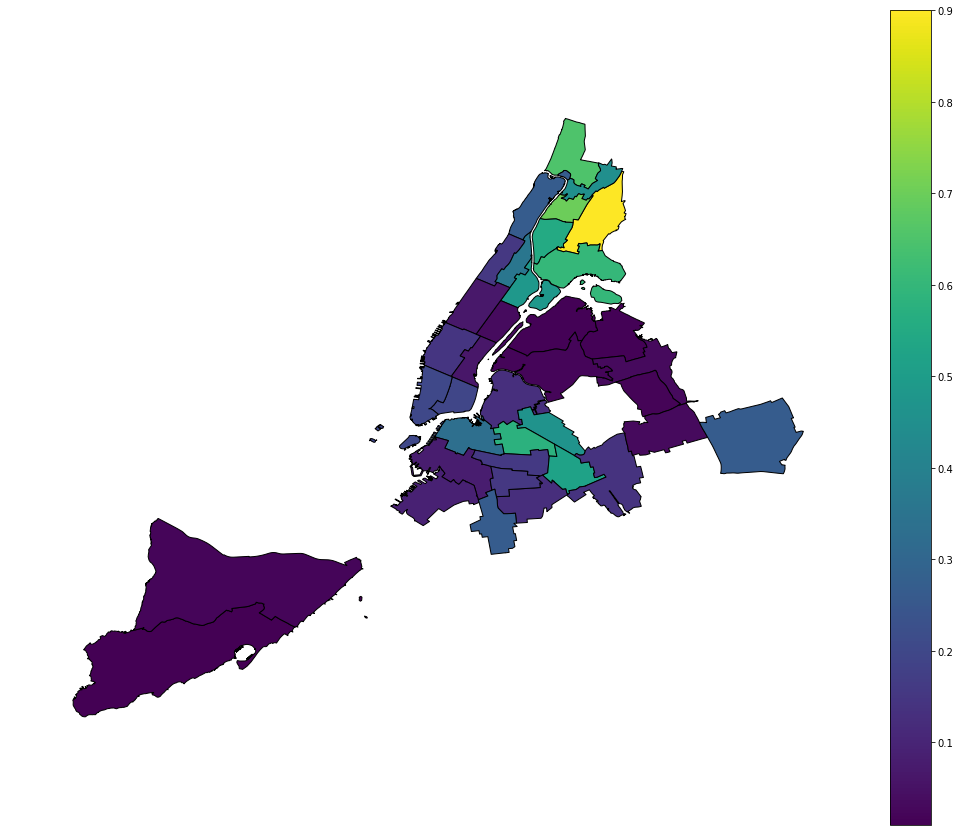

In [51]:
fig = pl.figure(figsize = (18,15))
ax = fig.add_subplot(111)
foodstamps_ebt_percent.plot("EBT Calls Per Day",ax=ax,legend=True,linewidth=1,edgecolor='black')
ax.axis('off');
#ax.set_title('Median EBT calls per day in NYC', fontsize=15)

In [52]:
#histogram_intersection = lambda a, b: np.minimum(a, b).sum().round(decimals=1)
foodstamps_ebt_percent[['EBT Calls Per Day','percent_households_receiving_food_stamps/snap_estimate_households']].corr()

,EBT Calls Per Day,percent_households_receiving_food_stamps/snap_estimate_households
EBT Calls Per Day,1.000000,0.801612
percent_households_receiving_food_stamps/snap_estimate_households,0.801612,1.000000


In [53]:
merged_pd = pd.DataFrame(foodstamps_ebt_percent)
#merged_pd['EBT calls per day 100'] = merged_pd['EBT Calls Per Day']*100 

Text(0, 0.5, 'percentage of households receiving food stamps')

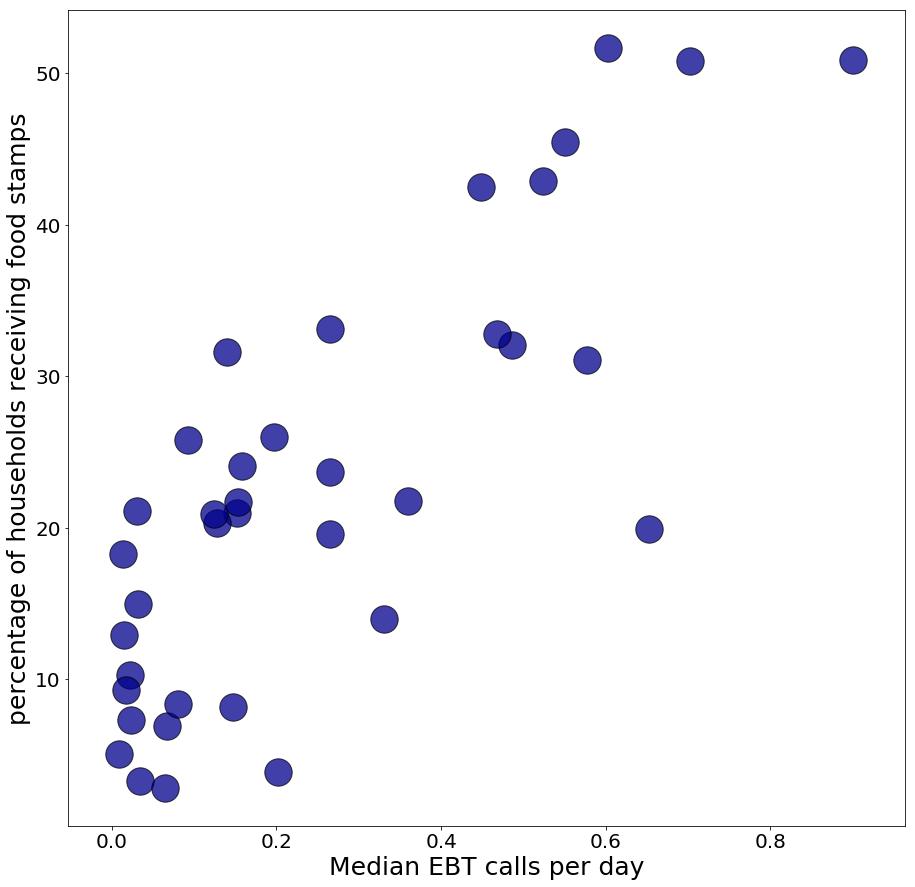

In [101]:
fig = pl.figure(figsize = (20,20))
ax = fig.add_subplot(111)
merged_pd.plot.scatter(x='EBT Calls Per Day', y='percent_households_receiving_food_stamps/snap_estimate_households', c='DarkBlue',figsize=(15,15),ax=ax,s=750,alpha=.75,edgecolor='black')
#ax.set_title('Scatterplot of median EBT calls per day vs percentage of households receiving food stamps', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
pl.xlabel('Median EBT calls per day',fontsize=25)
pl.ylabel('percentage of households receiving food stamps',fontsize=25)

In [55]:
#the positive correlation above warrants i look into their relationship visually, there seems to be some points that tend to closer. indicating a possible pattern.

In [56]:
X=merged_pd[['EBT Calls Per Day','percent_households_receiving_food_stamps/snap_estimate_households']]
from sklearn.cluster import KMeans

[2188.526048521901, 733.9673118219195, 346.88824159402907, 219.82556756322455, 140.71758715591085, 82.05747864460957, 36.25505686562952, 29.231202451679817]


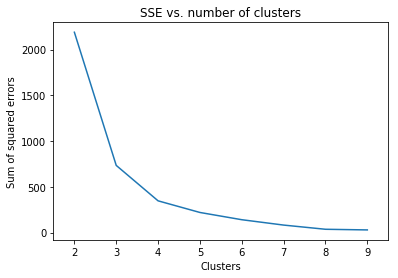

In [57]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(X)
    SSE.append(res.inertia_)
print(SSE)

plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

In [58]:
#based on the elbow plot, i would select 4 clusters

Cluster assignments: [0 1 1 1 1 1 3 0 0 3 2 2 2 2 0 2 2 2 0 3 3 2 2 0 1 3 0 0 0 0 2 0 0 2 2 0 0]

Cluster centers:
 [[ 0.18732037 21.37142857]
 [ 0.62110772 47.38333333]
 [ 0.08427742  7.7       ]
 [ 0.38714038 32.14      ]]

Sum of squared errors: 346.88824159402907


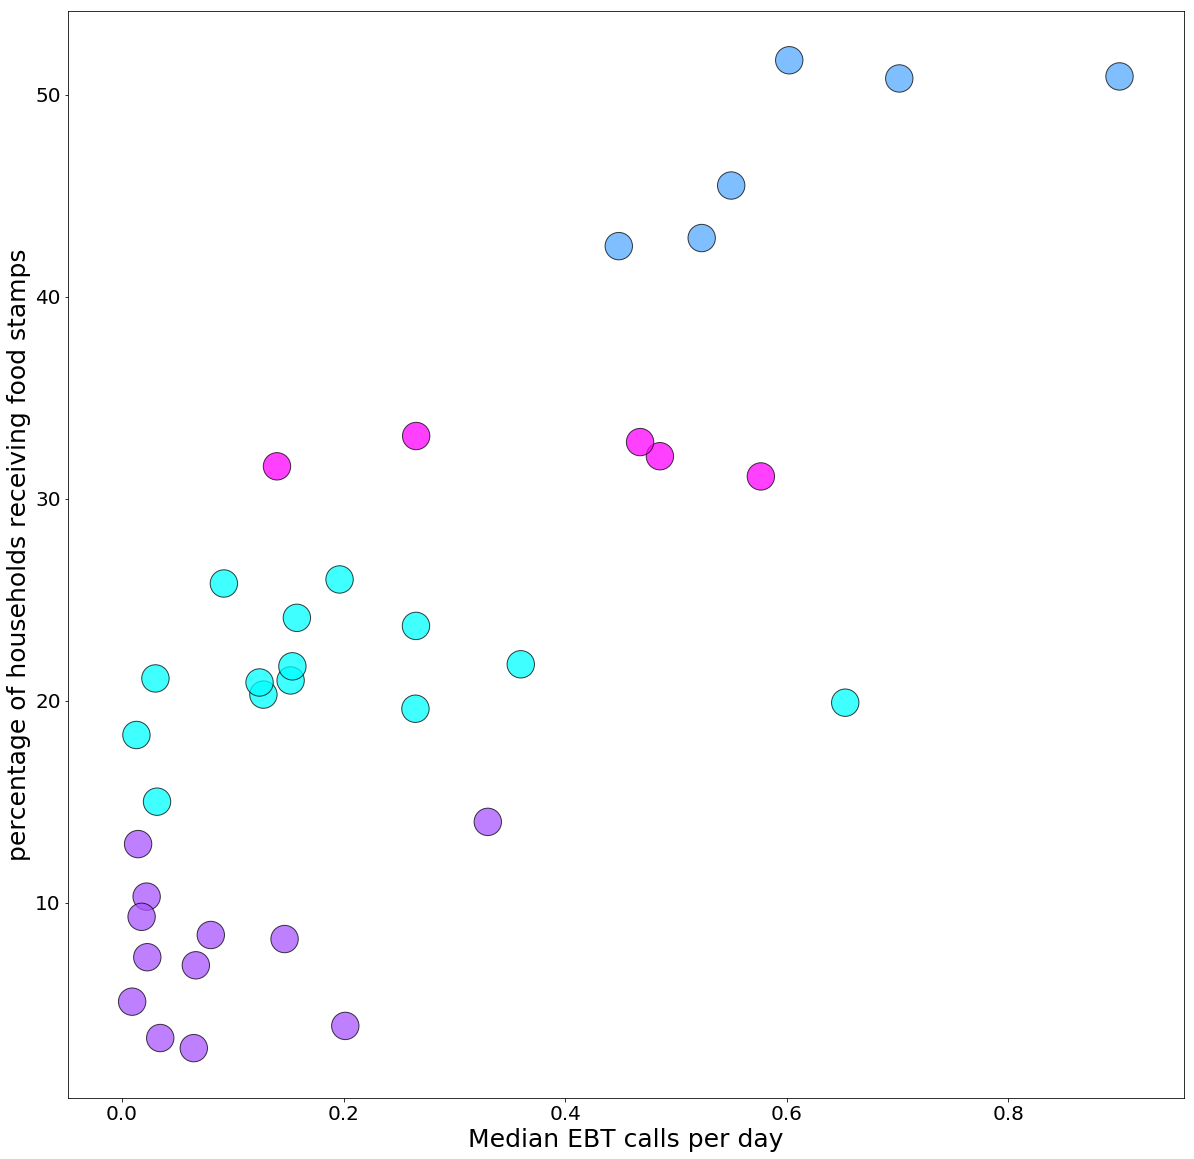

In [95]:
km = KMeans(random_state=234,n_clusters=4)
res=km.fit(X)

print('Cluster assignments:',res.labels_)
print('\nCluster centers:\n',res.cluster_centers_)
print('\nSum of squared errors:',res.inertia_)

# plot points and cluster assigments
fig = plt.figure(figsize=(20,20))
# We define a fake subplot that is in fact only the plot.  
ax = fig.add_subplot(111)
plt.scatter(X['EBT Calls Per Day'],X['percent_households_receiving_food_stamps/snap_estimate_households'],c=res.labels_,cmap=plt.cm.cool,s=750,alpha=.75,edgecolor='black')
pl.xlabel('Median EBT calls per day',fontsize=25)
pl.ylabel('percentage of households receiving food stamps',fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.show()

In [60]:
#visualizing the four clusters in the scatter plot

In [61]:
with_clusters = pd.concat((merged_pd,pd.DataFrame(res.labels_)),axis=1)

In [62]:
with_clusters = with_clusters.rename(columns={0:'clusters'})

In [63]:
with_clusters.head()

,id,id2,geography_x,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng,geometry,geography_y,EBT Calls Per Day,clusters
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...,"NYC-Bronx Community District 8--Riverdale, Fie...",0.652961,0
1,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705,3705,1.224951e+08,68657.316149,POLYGON ((-73.87045508990893 40.86663286876232...,"NYC-Bronx Community District 3 & 6--Belmont, C...",0.900583,1
2,7950000US3603706,3603706,"NYC-Bronx Community District 7--Bedford Park, ...",45122,19157,42.5,3706,3706,4.388687e+07,51799.404183,POLYGON ((-73.87772817661512 40.88345419508449...,"NYC-Bronx Community District 7--Bedford Park, ...",0.448522,1
3,7950000US3603707,3603707,NYC-Bronx Community District 5--Morris Heights...,45284,23023,50.8,3707,3707,4.228113e+07,37347.925798,POLYGON ((-73.89964261686002 40.86221043694765...,NYC-Bronx Community District 5--Morris Heights...,0.701755,1
4,7950000US3603708,3603708,"NYC-Bronx Community District 4--Concourse, Hig...",49026,22286,45.5,3708,3708,5.589695e+07,34852.437966,"POLYGON ((-73.92478318783078 40.8447526648105,...","NYC-Bronx Community District 4--Concourse, Hig...",0.550000,1


In [64]:
with_clusters_pd = gpd.GeoDataFrame(with_clusters, geometry="geometry")

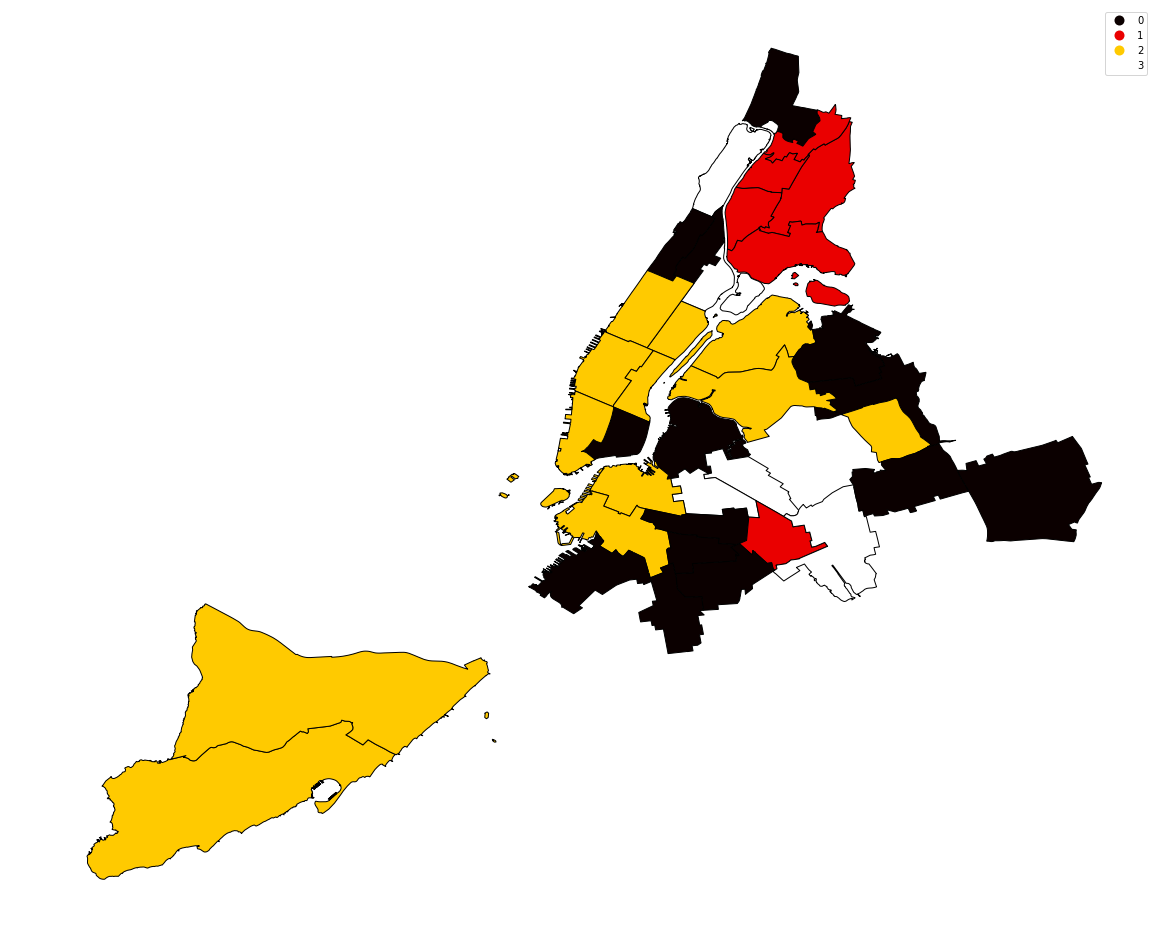

In [96]:
fig = pl.figure(figsize = (20,18))
ax = fig.add_subplot(111)
with_clusters_pd .plot("clusters",ax=ax,categorical=True,legend=True,cmap='hot',linewidth=1,edgecolor='black')
ax.axis('off');
#ax.set_title('Cluster Assignments', fontsize=15)

In [66]:
#there doesn't seem an obvious geospatial pattern to me

In [67]:
with_clusters.groupby('clusters')[['percent_households_receiving_food_stamps/snap_estimate_households']].describe()

percent_households_receiving_food_stamps/snap_estimate_households  \
                                                                     count   
clusters                                                                     
0                                                      14.0                  
1                                                       6.0                  
2                                                      12.0                  
3                                                       5.0                  

                                                                 
               mean       std   min    25%    50%     75%   max  
clusters                                                         
0         21.371429  2.923493  15.0  20.00  21.05  23.225  26.0  
1         47.383333  4.246606  42.5  43.55  48.15  50.875  51.7  
2          7.700000  3.594946   2.8   4.80   7.75   9.550  14.0  
3         32.140000  0.826438  31.1  31.60  32.10  32.800  33.1

In [68]:
with_clusters.groupby('clusters')[['EBT Calls Per Day']].describe()

EBT Calls Per Day                                                    \
                     count      mean       std       min       25%       50%   
clusters                                                                       
0                     14.0  0.187320  0.165950  0.013035  0.100045  0.153045   
1                      6.0  0.621108  0.160844  0.448522  0.530032  0.576205   
2                     12.0  0.084277  0.097196  0.009166  0.021115  0.049673   
3                      5.0  0.387140  0.178922  0.139935  0.265591  0.467742   

                              
               75%       max  
clusters                      
0         0.247805  0.652961  
1         0.676918  0.900583  
2         0.096826  0.330258  
3         0.485636  0.576797

In [69]:
#bassed on the mean, the clusters follow to some extent the same degree of ordering
#i.e. cluster (lowest to highest) 2 -> 0 ->  3 -> 1 for both percentage of households receiving food stamps and median EBT calls per day

In [70]:
#might be important ot check into the socio-economic factors affecting these neighborhood-clusters

In [71]:
#TODO
#get socioeconomic factors for each clusters, describe each cluster. using cluster labels as dependent variables predict cluster assignments of non-coverage areas of linknycs. this can tell you which areas show
#that may potentially benefit with linknyc kiosks